In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [3]:
df = pd.read_csv("matchups1-1.csv",  nrows=999999)

In [4]:
df.head()

,P_MATCH_ID,GOLDEARNED,TOTALMINIONSKILLED,WIN,KILLS,ASSISTS,DEATHS,CHAMPION,VISIONSCORE,PUUID,TOTALDAMAGEDEALTTOCHAMPIONS,SUMMONERNAME,GAMEVERSION,Unnamed: 13
0,BR1_2304032235_utility,5218,16,False,1,6,6,Bard,28,UNNl1KcPO98UoXiuRpQBefEKJbtCF_80b0_2s0Cwa5FiYi...,4500,batata 12121212,11.13.382.1241,NaN
1,BR1_2304032235_utility,7515,29,True,1,20,1,Blitzcrank,40,w2DLeo91qdfD72dpGgapMOKh_4IZ9IMF29neabiS0QTe8W...,7716,love yourseIf,11.13.382.1241,NaN
2,BR1_2304032235_jungle,9197,47,False,5,5,5,Nocturne,17,wDtmVguiopT93yrxtv2L88LxAVWC8E2fj_F3FDW81nCuSU...,9696,NTM HACKER,11.13.382.1241,NaN
3,BR1_2304032235_jungle,10564,37,True,6,8,4,Kayn,12,zVKtTZrdKVIpXwIMlsuSQjwOgqxx0DMhnWDFL7MrAKxXZq...,15291,unsuri,11.13.382.1241,NaN
4,BR1_2303451507_top,10598,158,False,6,8,7,Pantheon,17,sTevUOXxKjNW7dpbtyu9wjn8KZxzN63_f2MfGc1EALDjtq...,20568,Nome e Numeros,11.13.382.1241,NaN


In [5]:
df['matchID'] = df['P_MATCH_ID'].str.split('_').str[1]
df['position'] = df['P_MATCH_ID'].str.split('_').str[2]
df["WIN"] = df["WIN"].astype(int)
df.head()

,P_MATCH_ID,GOLDEARNED,TOTALMINIONSKILLED,WIN,KILLS,ASSISTS,DEATHS,CHAMPION,VISIONSCORE,PUUID,TOTALDAMAGEDEALTTOCHAMPIONS,SUMMONERNAME,GAMEVERSION,Unnamed: 13,matchID,position
0,BR1_2304032235_utility,5218,16,0,1,6,6,Bard,28,UNNl1KcPO98UoXiuRpQBefEKJbtCF_80b0_2s0Cwa5FiYi...,4500,batata 12121212,11.13.382.1241,NaN,2304032235,utility
1,BR1_2304032235_utility,7515,29,1,1,20,1,Blitzcrank,40,w2DLeo91qdfD72dpGgapMOKh_4IZ9IMF29neabiS0QTe8W...,7716,love yourseIf,11.13.382.1241,NaN,2304032235,utility
2,BR1_2304032235_jungle,9197,47,0,5,5,5,Nocturne,17,wDtmVguiopT93yrxtv2L88LxAVWC8E2fj_F3FDW81nCuSU...,9696,NTM HACKER,11.13.382.1241,NaN,2304032235,jungle
3,BR1_2304032235_jungle,10564,37,1,6,8,4,Kayn,12,zVKtTZrdKVIpXwIMlsuSQjwOgqxx0DMhnWDFL7MrAKxXZq...,15291,unsuri,11.13.382.1241,NaN,2304032235,jungle
4,BR1_2303451507_top,10598,158,0,6,8,7,Pantheon,17,sTevUOXxKjNW7dpbtyu9wjn8KZxzN63_f2MfGc1EALDjtq...,20568,Nome e Numeros,11.13.382.1241,NaN,2303451507,top


In [6]:
df = df.groupby(['matchID', 'WIN'], as_index = False).sum()
df

C:\Users\oqiu1\AppData\Local\Temp\ipykernel_31040\1228642102.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['matchID', 'WIN'], as_index = False).sum()


,matchID,WIN,GOLDEARNED,TOTALMINIONSKILLED,KILLS,ASSISTS,DEATHS,VISIONSCORE,TOTALDAMAGEDEALTTOCHAMPIONS,Unnamed: 13
0,1001288357,0,31550,467,5,4,21,75,42125,0.0
1,1001288357,1,41019,526,21,24,5,107,51758,0.0
2,1001303651,0,46640,486,22,26,39,124,85366,0.0
3,1001303651,1,59825,520,39,76,22,135,95004,0.0
4,1001341779,0,51776,723,18,28,28,197,56590,0.0
...,...,...,...,...,...,...,...,...,...,...
10553,971925188,1,59431,632,28,50,23,124,88083,0.0
10554,971929106,0,51277,677,21,37,36,195,60394,0.0
10555,971929106,1,63935,691,36,54,21,199,76772,0.0
10556,971951103,0,18495,277,3,3,13,37,15352,0.0


# Individual team Perceptron

In [7]:
df2 = df.drop(columns=["matchID","Unnamed: 13"])
X = df2.drop(columns=["WIN"])
y = df2["WIN"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
p = Perceptron(random_state=42)
p.fit(X_train, y_train)

prediction_train = p.predict(X_train)
print("Train Prediction: ", prediction_train)

prediction_test = p.predict(X_test)
print("Test Prediction: ", prediction_test)

train_score = accuracy_score(prediction_train, y_train)
print("Train Score: ", train_score)

test_score = accuracy_score(prediction_test, y_test)
print("Test Score: ", test_score)

Train Prediction:  [1 0 1 ... 0 1 0]
Test Prediction:  [1 1 1 ... 1 1 1]
Train Score:  0.6974409727131344
Test Score:  0.7024390243902439


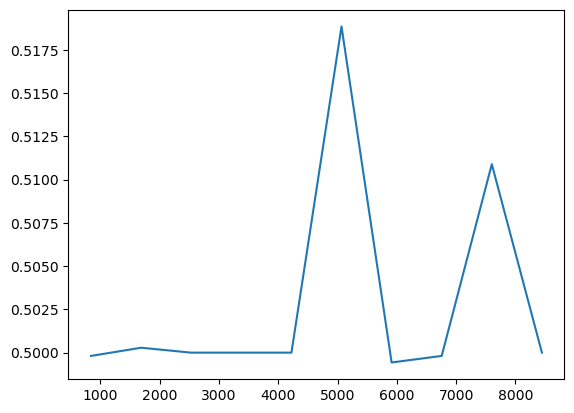

In [8]:

train_size_abs, train_scores, test_scores = learning_curve(p, X, y, train_sizes=[0.1,0.2,0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1])
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_size_abs, test_scores)

# Match Perceptron

In [9]:
df3 = df.drop(columns=["Unnamed: 13"])
df3.head()

,matchID,WIN,GOLDEARNED,TOTALMINIONSKILLED,KILLS,ASSISTS,DEATHS,VISIONSCORE,TOTALDAMAGEDEALTTOCHAMPIONS
0,1001288357,0,31550,467,5,4,21,75,42125
1,1001288357,1,41019,526,21,24,5,107,51758
2,1001303651,0,46640,486,22,26,39,124,85366
3,1001303651,1,59825,520,39,76,22,135,95004
4,1001341779,0,51776,723,18,28,28,197,56590


Modifying Dataframe To Facilitate a WIN LOSE IN A SINGLE MATCH

In [10]:


# create two separate dataframes for the winning and losing teams
win_df = df3[df3['WIN'] == 1]
lose_df = df3[df3['WIN'] == 0]

# merge the two dataframes by matchID, dropping the 'WIN' column from one of them
merged_df = pd.merge(win_df, lose_df.drop('WIN', axis=1), on='matchID')
merged_df1 = pd.merge(lose_df, win_df.drop('WIN', axis=1), on='matchID')

# rename columns to indicate whether they correspond to the winning or losing team
#merged_df.columns = [col + '_team1' if col != 'matchID' else col for col in merged_df.columns[:8]] + \
#                    [col + '_team2' for col in merged_df.columns[8:]]
#
# reorder columns to match the order you specified
finalMerged = pd.concat([merged_df, merged_df1], ignore_index = True)
finalMerged



,matchID,WIN,GOLDEARNED_x,TOTALMINIONSKILLED_x,KILLS_x,ASSISTS_x,DEATHS_x,VISIONSCORE_x,TOTALDAMAGEDEALTTOCHAMPIONS_x,GOLDEARNED_y,TOTALMINIONSKILLED_y,KILLS_y,ASSISTS_y,DEATHS_y,VISIONSCORE_y,TOTALDAMAGEDEALTTOCHAMPIONS_y
0,1001288357,1,41019,526,21,24,5,107,51758,31550,467,5,4,21,75,42125
1,1001303651,1,59825,520,39,76,22,135,95004,46640,486,22,26,39,124,85366
2,1001341779,1,58452,708,28,46,18,173,70753,51776,723,18,28,28,197,56590
3,1001406448,1,62365,516,50,58,35,181,104271,55554,569,35,49,50,147,109302
4,1001432370,1,51374,586,30,52,13,148,69060,40703,556,12,11,30,133,34896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10553,971856103,0,37860,482,15,13,35,113,49076,50975,499,35,59,16,125,69968
10554,971878861,0,31296,451,6,9,21,92,32934,40006,448,21,24,6,110,43102
10555,971925188,0,56201,704,23,44,28,184,95377,59431,632,28,50,23,124,88083
10556,971929106,0,51277,677,21,37,36,195,60394,63935,691,36,54,21,199,76772


In [11]:

X = finalMerged.drop(columns=["matchID","WIN"])
y = finalMerged["WIN"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
p = Perceptron(random_state=42)
p.fit(X_train, y_train)

prediction_train = p.predict(X_train)
print("Train Prediction: ", prediction_train)

prediction_test = p.predict(X_test)
print("Test Prediction: ", prediction_test)

train_score = accuracy_score(prediction_train, y_train)
print("Train Score: ", train_score)

test_score = accuracy_score(prediction_test, y_test)
print("Test Score: ", test_score)


Train Prediction:  [0 0 0 ... 0 1 0]
Test Prediction:  [1 1 1 ... 1 0 0]
Train Score:  0.959705923936095
Test Score:  0.9595408895265424


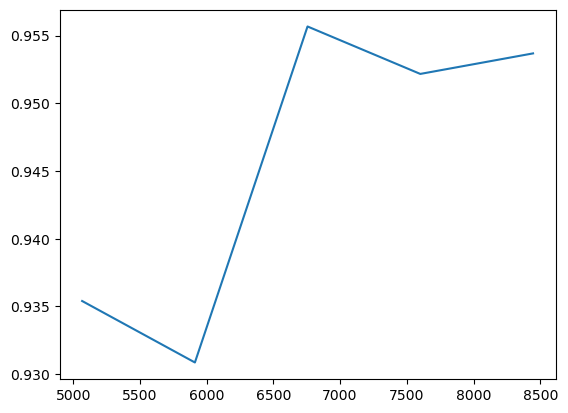

In [12]:
train_size_abs, train_scores, test_scores = learning_curve(p, X, y, train_sizes=[0.1,0.2,0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1])
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_size_abs, test_scores)

# Decision Tree Classifier

In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

prediction_train = clf.predict(X_train)
print("Train Prediction: ", prediction_train)

prediction_test = clf.predict(X_test)
print("Test Prediction: ", prediction_test)

train_score = accuracy_score(prediction_train, y_train)
print("Train Score: ", train_score)

test_score = accuracy_score(prediction_test, y_test)
print("Test Score: ", test_score)

Train Prediction:  [0 0 0 ... 0 1 0]
Test Prediction:  [1 1 1 ... 1 0 0]
Train Score:  1.0
Test Score:  0.927116212338594


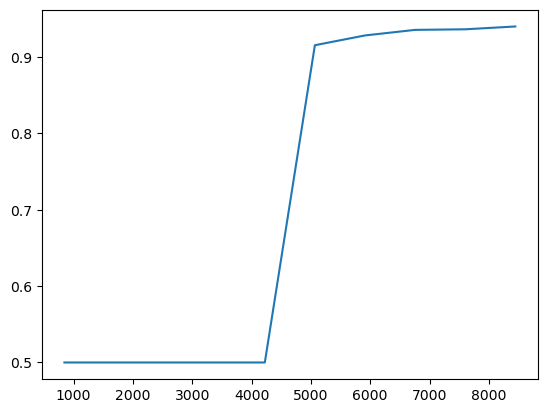

In [14]:

train_size_abs, train_scores, test_scores = learning_curve(clf, X, y, train_sizes=[0.1,0.2,0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1])
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_size_abs, test_scores)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression 

reg = LogisticRegression(solver= 'liblinear')

reg.fit(X_train,y_train)

prediction_train = reg.predict(X_train)
print("Train Prediction: ", prediction_train)

prediction_test = reg.predict(X_test)
print("Test Prediction: ", prediction_test)

train_score = accuracy_score(prediction_train, y_train)
print("Train Score: ", train_score)

test_score = accuracy_score(prediction_test, y_test)
print("Test Score: ", test_score)

Train Prediction:  [0 0 0 ... 1 1 0]
Test Prediction:  [1 1 1 ... 1 0 0]
Train Score:  0.9746924925774071
Test Score:  0.9704447632711621


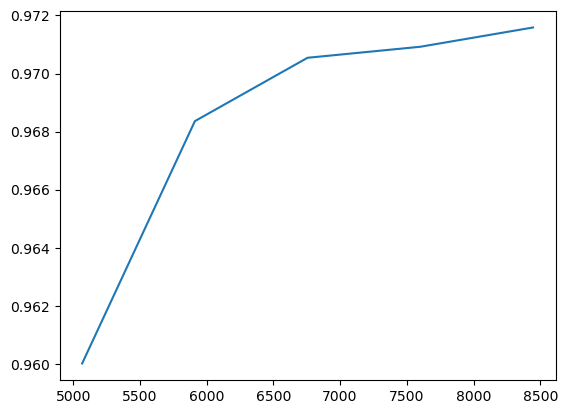

In [16]:
train_size_abs, train_scores, test_scores = learning_curve(reg, X, y, train_sizes=[0.1,0.2,0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1])
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_size_abs, test_scores)

# Final Merged Ratio(21 features) models

In [17]:

finalMergedRatio = finalMerged
# get the column names with suffix _x
x_cols = [col for col in finalMergedRatio.columns if col.endswith("_x")]

# create new columns with the ratio of the columns with suffix _x and _y
for col in x_cols:
    ratio_col = col.replace("_x", "_ratio")
    finalMergedRatio[ratio_col] = finalMergedRatio[col] / finalMergedRatio[col.replace("_x", "_y")]

# print the updated dataframe
finalMergedRatio = finalMergedRatio.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

finalMergedRatio


,matchID,WIN,GOLDEARNED_x,TOTALMINIONSKILLED_x,KILLS_x,ASSISTS_x,DEATHS_x,VISIONSCORE_x,TOTALDAMAGEDEALTTOCHAMPIONS_x,GOLDEARNED_y,...,DEATHS_y,VISIONSCORE_y,TOTALDAMAGEDEALTTOCHAMPIONS_y,GOLDEARNED_ratio,TOTALMINIONSKILLED_ratio,KILLS_ratio,ASSISTS_ratio,DEATHS_ratio,VISIONSCORE_ratio,TOTALDAMAGEDEALTTOCHAMPIONS_ratio
0,1001288357,1,41019,526,21,24,5,107,51758,31550,...,21,75,42125,1.300127,1.126338,4.200000,6.000000,0.238095,1.426667,1.228677
1,1001303651,1,59825,520,39,76,22,135,95004,46640,...,39,124,85366,1.282697,1.069959,1.772727,2.923077,0.564103,1.088710,1.112902
2,1001341779,1,58452,708,28,46,18,173,70753,51776,...,28,197,56590,1.128940,0.979253,1.555556,1.642857,0.642857,0.878173,1.250274
3,1001406448,1,62365,516,50,58,35,181,104271,55554,...,50,147,109302,1.122601,0.906854,1.428571,1.183673,0.700000,1.231293,0.953972
4,1001432370,1,51374,586,30,52,13,148,69060,40703,...,30,133,34896,1.262167,1.053957,2.500000,4.727273,0.433333,1.112782,1.979023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10553,971856103,0,37860,482,15,13,35,113,49076,50975,...,16,125,69968,0.742717,0.965932,0.428571,0.220339,2.187500,0.904000,0.701406
10554,971878861,0,31296,451,6,9,21,92,32934,40006,...,6,110,43102,0.782283,1.006696,0.285714,0.375000,3.500000,0.836364,0.764094
10555,971925188,0,56201,704,23,44,28,184,95377,59431,...,23,124,88083,0.945651,1.113924,0.821429,0.880000,1.217391,1.483871,1.082808
10556,971929106,0,51277,677,21,37,36,195,60394,63935,...,21,199,76772,0.802018,0.979740,0.583333,0.685185,1.714286,0.979899,0.786667


### Perceptron

In [25]:
X = finalMergedRatio.drop(columns=["matchID","WIN"])
y = finalMergedRatio["WIN"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
p = Perceptron(random_state=42)
p.fit(X_train, y_train)

prediction_train = p.predict(X_train)
print("Train Prediction: ", prediction_train)

prediction_test = p.predict(X_test)
print("Test Prediction: ", prediction_test)

train_score = accuracy_score(prediction_train, y_train)
print("Train Score: ", train_score)

test_score = accuracy_score(prediction_test, y_test)
print("Test Score: ", test_score)

Train Prediction:  [1 0 0 ... 0 1 0]
Test Prediction:  [0 1 0 ... 1 1 1]
Train Score:  0.968
Test Score:  0.9669373549883991


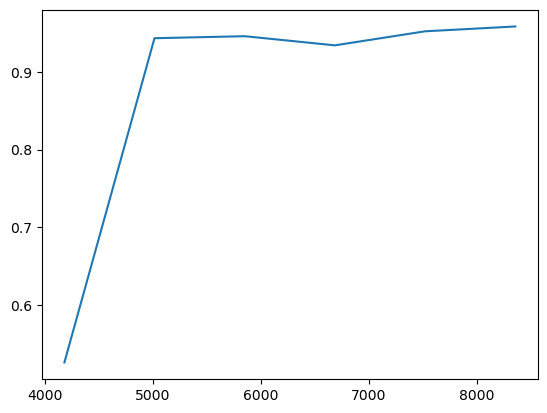

In [26]:
train_size_abs, train_scores, test_scores = learning_curve(p, X, y, train_sizes=[0.1,0.2,0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1])
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_size_abs, test_scores)

### Decision Trees

In [27]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

prediction_train = clf.predict(X_train)
print("Train Prediction: ", prediction_train)

prediction_test = clf.predict(X_test)
print("Test Prediction: ", prediction_test)

train_score = accuracy_score(prediction_train, y_train)
print("Train Score: ", train_score)

test_score = accuracy_score(prediction_test, y_test)
print("Test Score: ", test_score)

Train Prediction:  [1 0 0 ... 0 1 0]
Test Prediction:  [0 1 0 ... 1 0 1]
Train Score:  1.0
Test Score:  0.9611368909512761


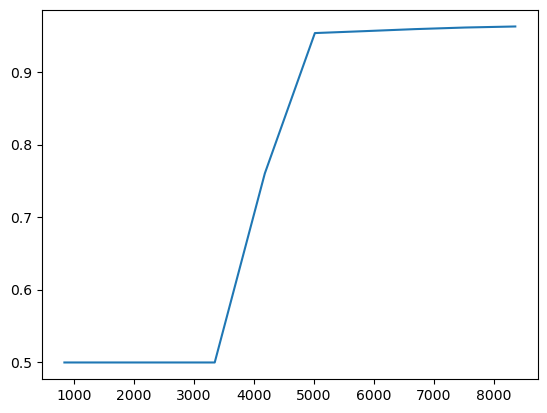

In [28]:

train_size_abs, train_scores, test_scores = learning_curve(clf, X, y, train_sizes=[0.1,0.2,0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1])
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_size_abs, test_scores)

# Logistic Regression with 21 features (original 14 including new 7)

In [21]:
reg21 = LogisticRegression(solver= 'liblinear')

reg21.fit(X_train,y_train)

prediction_train21 = reg21.predict(X_train)
print("Train Prediction: ", prediction_train)

prediction_test21 = reg21.predict(X_test)
print("Test Prediction: ", prediction_test)

train_score21 = accuracy_score(prediction_train21, y_train)
print("Train Score: ", train_score)

test_score21 = accuracy_score(prediction_test21, y_test)
print("Test Score: ", test_score)

Train Prediction:  [1 0 0 ... 0 1 0]
Test Prediction:  [0 1 0 ... 1 0 1]
Train Score:  1.0
Test Score:  0.9588167053364269


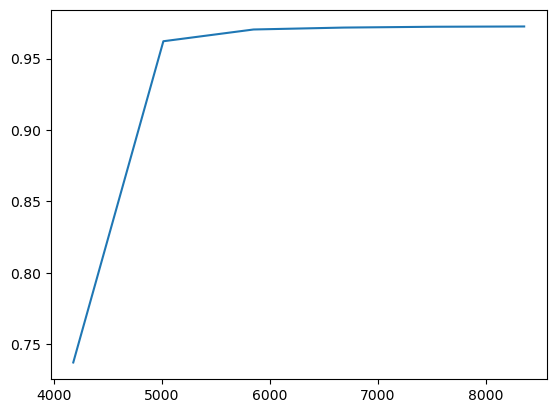

In [22]:
train_size_abs, train_scores, test_scores = learning_curve(reg, X, y, train_sizes=[0.1,0.2,0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1])
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_size_abs, test_scores)